In [22]:
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv('Mall_Customers.csv')

In [24]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [26]:
data = data.rename(columns = {'Annual Income (k$)':'income','Spending Score (1-100)':'score'})
data.head()

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [27]:
import matplotlib.pyplot as plt

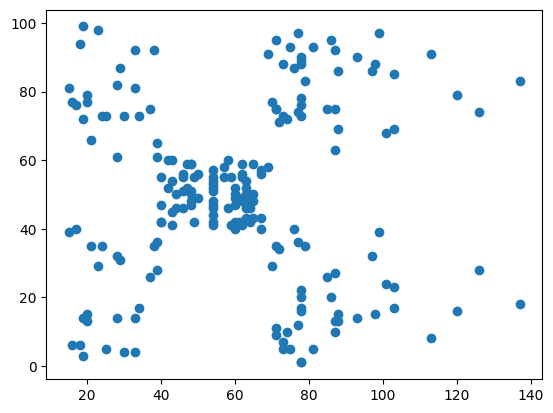

In [29]:
plt.scatter(data['income'],data['score'])

In [37]:
from sklearn.cluster import KMeans
K_Values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []
for K in K_Values:
    model = KMeans(n_clusters=K)
    model.fit(data[['income','score']])
    wcss_error.append(model.inertia_)
wcss_error

[269981.28,
 184609.9843409062,
 106348.37306211119,
 73880.64496247195,
 44454.47647967974,
 38797.9027638142,
 33869.428028278024,
 31734.88354206249,
 21794.8856090982,
 21089.109893048128]

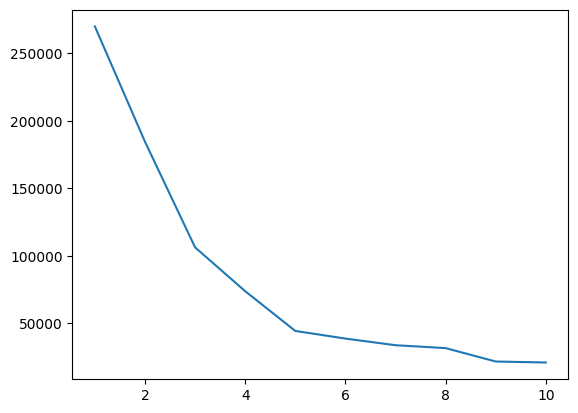

In [38]:
plt.plot(K_Values,wcss_error)

In [40]:
model = KMeans(n_clusters = 5)
model.fit(data[['income','score']])
pred = model.fit_predict(data)
pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [41]:
data['cluster']=pred
data.head()

,income,score,cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
